### Discription:
This is 2nd iteration of deep-learning classifier for predicting heart disease, the model is being trained on the "Predicting Heart Disease
Playground Series - Season 6 Episode 2" competition dataset. This iteration will cover regularization strategies  to improve the ROC-AUC score on the predicted probabilities. No EDA will be done again since it was already covered in teh Iteration 1 of this project.

## Importing the dataset:

In [47]:
import pandas as pd

train_path = "/kaggle/input/playground-series-s6e2/train.csv"
train_df = pd.read_csv(train_path)

train_df.head() #checking if the data has loaded successfully

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


## Preprocessing:
* Removing redundant features
* Seperating the targets and labels
* Encoding and Scaling pipelines (no imputing since theres no null values as seen EDA during iteration 1)

In [48]:
#Removing redundant columns
train_df.drop('id',axis=1)

#Seperating features and target:
X = train_df.drop('Heart Disease',axis=1)
y = train_df['Heart Disease']

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

#seperating numerical and categorical columns:
num_cols = ['Age','BP','Cholesterol','Max HR','ST depression','Number of vessels fluro','Thallium','EKG results',]
cat_cols = ['Sex','Chest pain type','FBS over 120','Exercise angina','Slope of ST']

#pipelines for preprocessing features
num_pipe = Pipeline([
    ('scaler',StandardScaler())
])
cat_pipe = Pipeline([
    ('encoder',OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('num',num_pipe,num_cols),
    ('cat',cat_pipe,cat_cols),
])

In [50]:
X_processed = preprocessor.fit_transform(X)
X_processed.shape

(630000, 21)

In [51]:
from sklearn.preprocessing import LabelEncoder

#Encoding the target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [52]:
from sklearn.model_selection import train_test_split

#Splitting the data into train/validation splits
X_train,X_val,y_train,y_val = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y)

## Defining model architecture:
The model will be as follows:
* 3 Densly connected layers.
* After each Dense layer there will be a Dropout layer and a BatchNormalization layers.
* The activation wont be directly passed into the dense layer insted it will be carried out after BatchNormalization layers because its the reccomended order, because BatchNorm is designed to normalize the linear outputs of a layer, not the activated outputs.
* Finally ending the model with an output layer with a sigmoid activation.

Also going to increase the layers capacity since our dataset is huge with 630,000 samples the capacity in last model was pretty low for data this size.

In [53]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "0"  # 0 = hide all, 1 = hide INFO, 2 = hide WARNING, 3 = hide ERROR
#The above piece of code is to hide the warnings

In [54]:
from tensorflow import keras
from tensorflow.keras import layers

inputs  = keras.Input(shape=(21,), name='input_layer')

x = layers.Dense(42, name='Dense_layer_1') (inputs)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)
x = layers.Dropout(0.2) (x)

x = layers.Dense(21, name='Dense_layer_2') (x)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)
x = layers.Dropout(0.2) (x)

x = layers.Dense(10, name='Dense_layer_3') (x)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)

outputs = layers.Dense(1, activation='sigmoid', name='Output_layer') (x)

model = keras.Model(inputs=inputs, outputs=outputs, name='Iter_2_classifier')

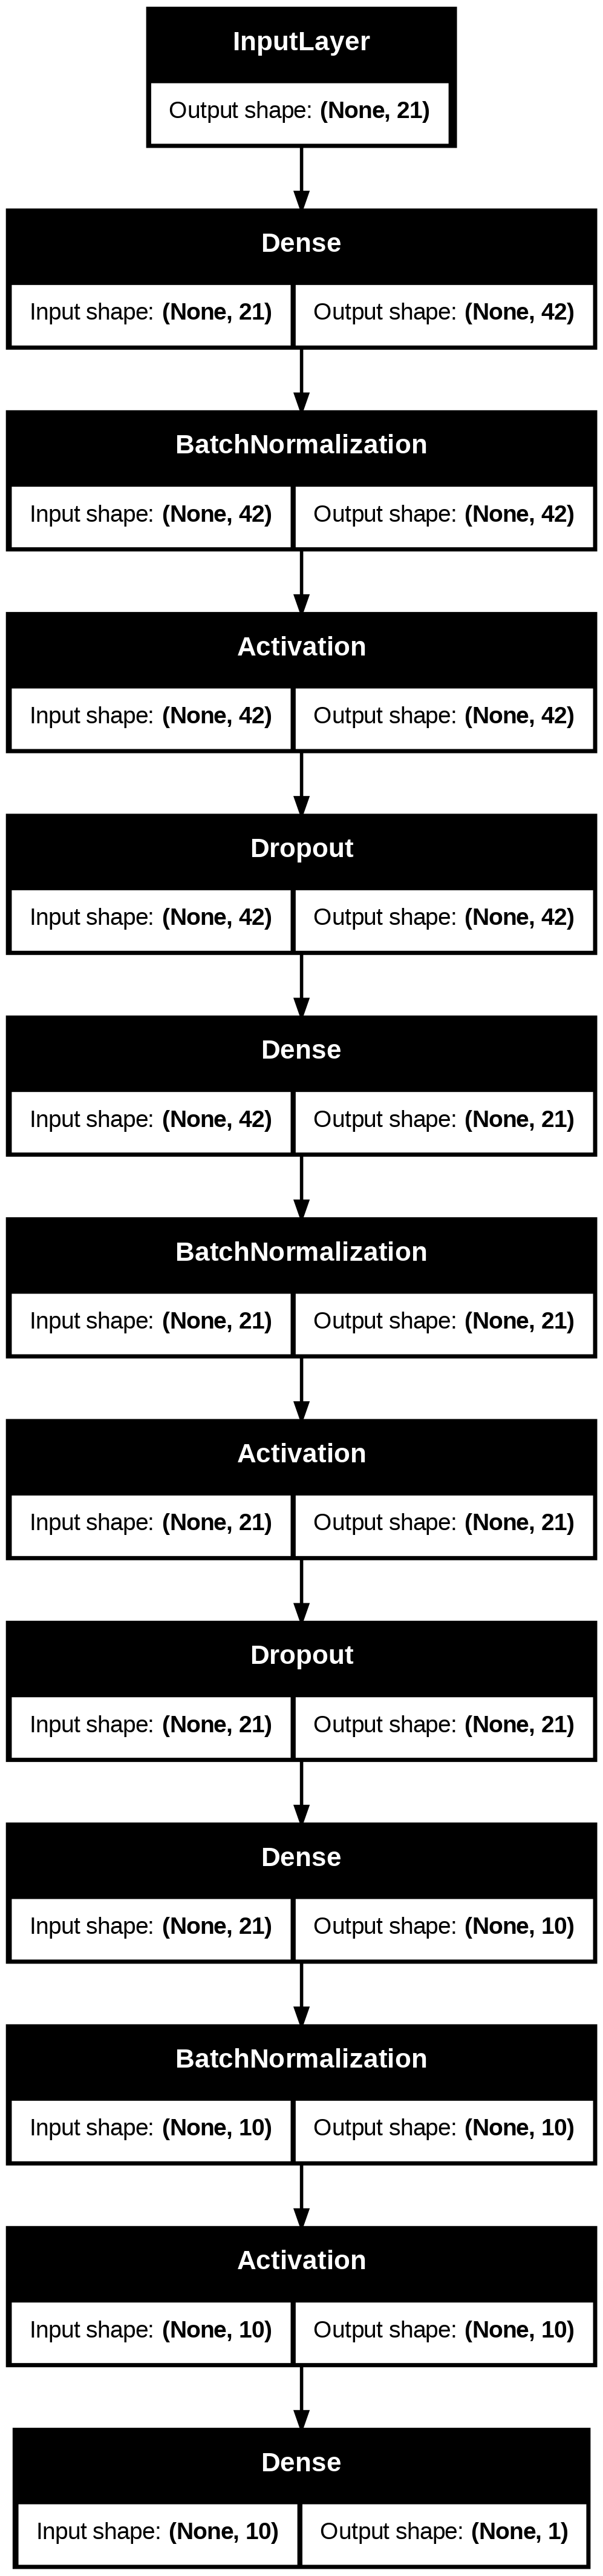

In [55]:
keras.utils.plot_model(model, show_shapes=True)

In [56]:
model.summary()

Model: "Iter_2_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_layer_1 (Dense)           │ (None, 42)             │           924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 42)             │           168 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_layer_2 (Dense)           │ (None, 21)             │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 21)             │            84 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_layer_3 (Dense)           │ (None, 10)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,350 (9.18 KB)

 Trainable params: 2,204 (8.61 KB)

 Non-trainable params: 146 (584.00 B)

## Compiling the model:
Using default optimizer **rmsprop**, the loss function will be **binary_crossentropy** since we are dealing with a binary_classification problem. Finally the metrics to monitor the performance will be ['accuracy','roc_auc'] since roc_auc is the metric that our test files area gonna be evaluated on. 

In [57]:
from tensorflow.keras.metrics import AUC

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy',AUC(name='roc_auc')])

#saving the best model where the loss function is at its lowest so it can be reused
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_classifier_model.keras',
        save_best_only=True,
        monitor='val_loss')
]

In [58]:
#training the model on training set and evaluating on validation set
history = model.fit(X_train,
             y_train,
             epochs=200,
             batch_size=300,
             callbacks=callbacks,
             validation_data=(X_val,y_val),
             verbose=0)

In [59]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'roc_auc', 'val_accuracy', 'val_loss', 'val_roc_auc'])

## Plotting loss and metrics progress graphs:

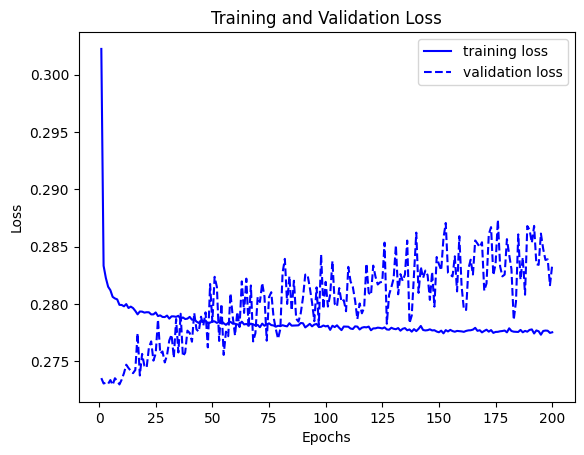

In [62]:
import matplotlib.pyplot as plt

#training loss and validation loss
epochs=200
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1,epochs+1),train_loss,'b-',label='training loss')
plt.plot(range(1,epochs+1),val_loss,'b--',label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

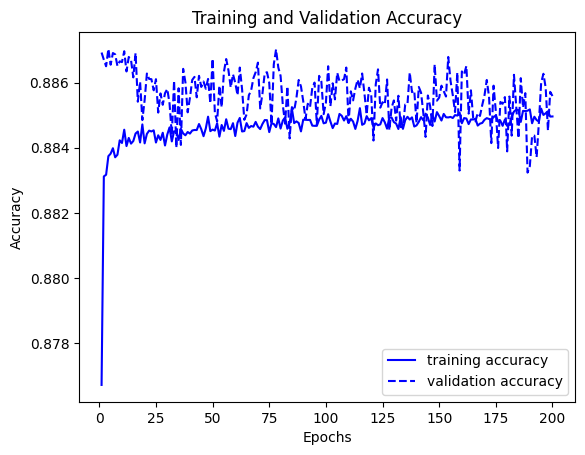

In [63]:
#training accuracy and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(1,epochs+1),train_acc,'b-',label='training accuracy')
plt.plot(range(1,epochs+1),val_acc,'b--',label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

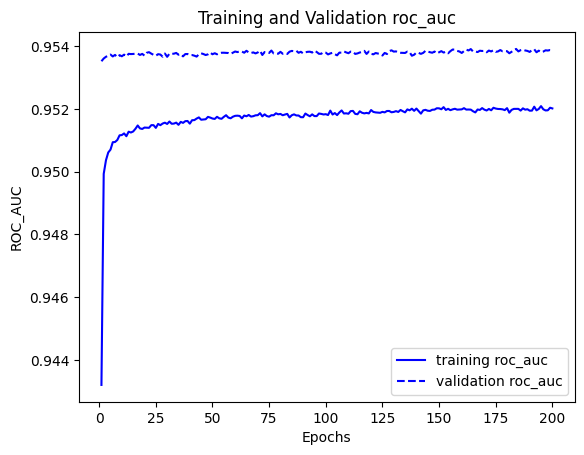

In [64]:
train_roc_auc = history.history['roc_auc']
val_roc_auc = history.history['val_roc_auc']

plt.plot(range(1,epochs+1),train_roc_auc,'b-',label='training roc_auc')
plt.plot(range(1,epochs+1),val_roc_auc,'b--',label='validation roc_auc')
plt.xlabel('Epochs')
plt.ylabel('ROC_AUC')
plt.title('Training and Validation roc_auc')
plt.legend()
plt.show()

Training the model again till around 50 epochs on full dataset, since the lowest achived validation loss was at teh begning the model cant be trusted really. Aroung epoch number 50 the model seems to close in on teh training loss so its a good idea to train the model again till that point.

## Model 2:

In [75]:
inputs  = keras.Input(shape=(21,), name='input_layer')

x = layers.Dense(42, name='Dense_layer_1') (inputs)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)
x = layers.Dropout(0.2) (x)

x = layers.Dense(21, name='Dense_layer_2') (x)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)
x = layers.Dropout(0.2) (x)

x = layers.Dense(10, name='Dense_layer_3') (x)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)

outputs = layers.Dense(1, activation='sigmoid', name='Output_layer') (x)

model = keras.Model(inputs=inputs, outputs=outputs, name='Iter_2_classifier_2')

In [76]:
from tensorflow.keras.metrics import AUC

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy',AUC(name='roc_auc')])

In [77]:
model.fit(X_processed,
        y_encoded,
        epochs=50,
        batch_size=300,
        verbose=1)

Epoch 1/50
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8411 - loss: 0.3605 - roc_auc: 0.9210
Epoch 2/50
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8839 - loss: 0.2818 - roc_auc: 0.9504
Epoch 3/50
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8841 - loss: 0.2810 - roc_auc: 0.9508
Epoch 4/50
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8840 - loss: 0.2806 - roc_auc: 0.9509
Epoch 5/50
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8841 - loss: 0.2797 - roc_auc: 0.9513
Epoch 6/50
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8843 - loss: 0.2798 - roc_auc: 0.9511
Epoch 7/50
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8849 - loss: 0.2788 - roc_auc: 0.9515
Epoch 8/50
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8838 - loss: 0.2808 - roc_auc: 0.9509
Epoch 9/50
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8845 - loss: 0.2790 - roc_auc: 0.9516
Epoch 10/50
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 5s 

## Importing test data:

In [78]:
#Importing the test data
test_path = '/kaggle/input/playground-series-s6e2/test.csv'
test_df = pd.read_csv(test_path)

test_df.head() #to check if the test data is loaded safely

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,630000,58,1,3,120,288,0,2,145,1,0.8,2,3,3
1,630001,55,0,2,120,209,0,0,172,0,0.0,1,0,3
2,630002,54,1,4,120,268,0,0,150,1,0.0,2,3,7
3,630003,44,0,3,112,177,0,0,168,0,0.9,1,0,3
4,630004,43,1,1,138,267,0,0,163,0,1.8,2,0,7


## Test data preprocessing:
Dropping the redundant columns same as we did for training data:

In [79]:
X_test = test_df.drop('id',axis=1)

In [80]:
X_test_processed = preprocessor.transform(X_test)
X_test_processed.shape #making sure the number of features are same as our processed training data

(270000, 21)

## Predicting on test data:
In keras models the **predict()** method gives back teh probabilities itself so we wont have to perform any transformations on the predicted output by the model.

In [81]:
y_pred_proba = model.predict(X_test_processed)

8438/8438 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


## Preparing the submission csv:

In [82]:
y_pred_proba = y_pred_proba.flatten() #converting from 2D to 1D

Submission = pd.DataFrame({
    'id':test_df['id'],
    'Heart Disease':y_pred_proba
})

Submission.to_csv('submission_iter1_1.csv',index=False)

For this heart disease dataset, adding BN and Dropout to an MLP does NOT improve ROC-AUC.